# Importing necessary libraries library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Steps in this process :

### 1) Data Cleaning
### 2) Data Analysis
### 3) Feature Engineering
### 4) Modelling
### 5) Website
### 6) Deployment

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Check for duplicates

In [6]:
df.duplicated().sum() # if returns 0, it means that no duplicate row at all !!!!!!

0

### Check for missing values

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [9]:
df['Ram'][0:5]

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: Ram, dtype: object

In [10]:
df.iloc[0:6]['Ram'].values

array(['8GB', '8GB', '8GB', '16GB', '8GB', '4GB'], dtype=object)

# Preprocessing the data

#### dropping the 'unnamed:0' column,  

In [11]:
df.drop(columns=['Unnamed: 0'],inplace=True)

#### Remove 'GB' from RAM

In [12]:
def remove_GB_keyword(obj):
    s=str(obj)
    return s.replace("GB","")

df['Ram']=df['Ram'].apply(remove_GB_keyword)

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Remove 'kg' from Weight

In [14]:
def remove_weight(obj):
    s=str(obj)
    return s.replace("kg","")

df['Weight']=df['Weight'].apply(remove_weight)

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Converting the datatype of Weight Column to float and Ram column to int

In [16]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float') 

In [17]:
type(df.iloc[0]['Ram'])

numpy.int32

In [18]:
df.info() # Verifying the same using the info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


# Perform EDA

In [19]:
import seaborn as sns

D:\Users\Newtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

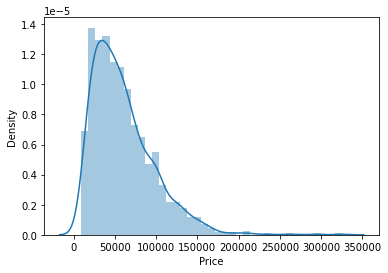

In [20]:
sns.distplot(df['Price']) # distplot depicts the variation in the data distribution. 
#distplot represents the overall distribution of continuous data variables.

<AxesSubplot:>

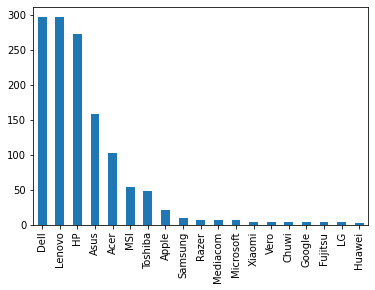

In [21]:
df['Company'].value_counts().plot(kind='bar')

### Barplot to see like which company has the most costliest laptops

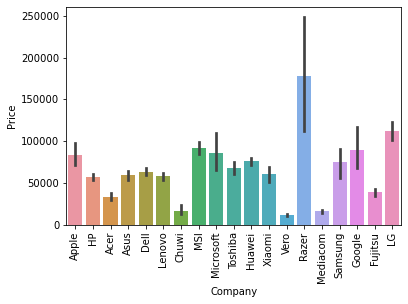

In [22]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Showing the different kinds of laptop

<AxesSubplot:>

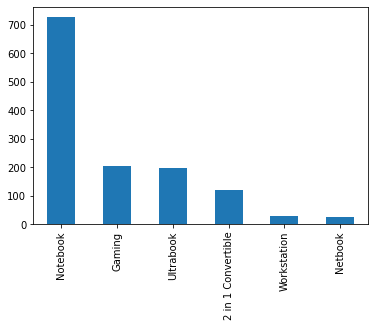

In [23]:
df['TypeName'].value_counts().plot(kind='bar')

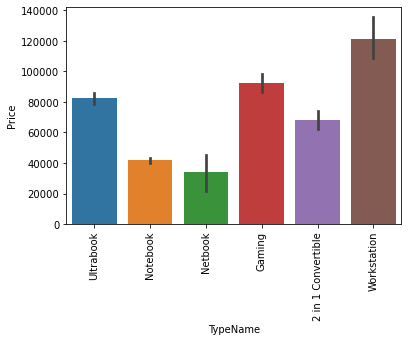

In [24]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

D:\Users\Newtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

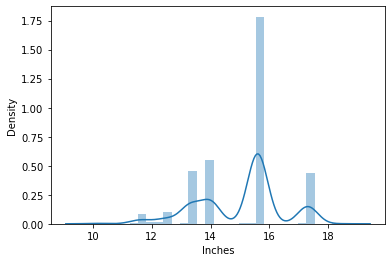

In [25]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

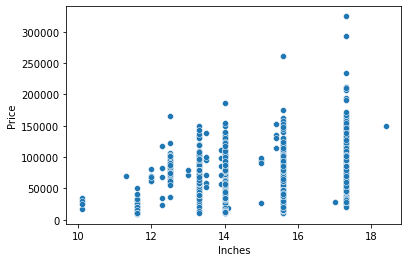

In [26]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

### From the above scatterplot, we can infer that thought the relation between the inches and price is not very strong, but still some of the most expensive ones have bigger screen and the smaller size ones have less prizes.

# Resolving the Screen Resolution Column.

In [27]:
df['ScreenResolution'].value_counts()[0:10]

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
Name: ScreenResolution, dtype: int64

### Making a new column called 'Touchscreen' to determine if the product supports touchscreen ability

In [28]:
def is_touchscreen(obj):
    s=str(obj)
    if 'Touchscreen' in s:
        return 1
    return 0

df['Touchscreen'] = df['ScreenResolution'].apply(is_touchscreen)

In [29]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

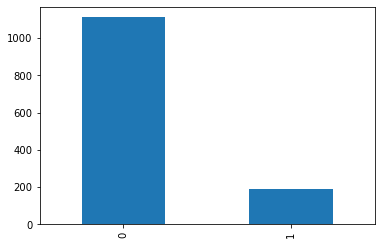

In [30]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

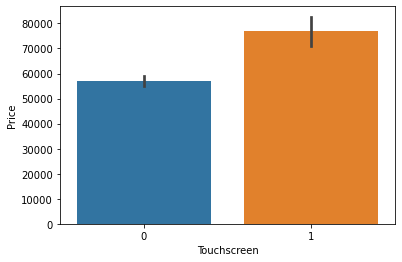

In [31]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
# Hence, the touchscreen laptop generally are having more price

### Making a new column called 'Ips' to determine if IPS is there in the screen or not

In [32]:
def is_tips(obj):
    s=str(obj)
    if 'IPS' in s:
        return 1
    return 0

df['Ips'] = df['ScreenResolution'].apply(is_touchscreen)

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0


<AxesSubplot:>

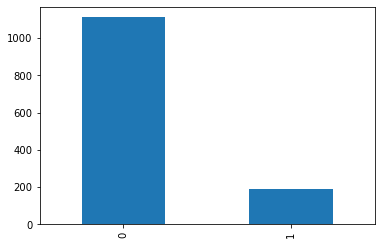

In [34]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

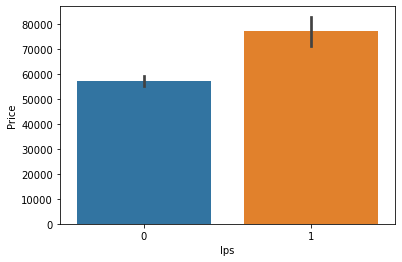

In [35]:
sns.barplot(x=df['Ips'],y=df['Price'])

## Making two new columns to store the x and y coordinates

In [36]:
def coord(obj):
    s=str(obj)
    return s.split('x')

df['coordinates']=df['ScreenResolution'].apply(coord)

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,coordinates
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,"[IPS Panel Retina Display 2560, 1600]"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,"[1440, 900]"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,"[Full HD 1920, 1080]"
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,"[IPS Panel Retina Display 2880, 1800]"
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,"[IPS Panel Retina Display 2560, 1600]"


In [38]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [39]:
df.drop(columns=['coordinates'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,IPS Panel Retina Display 2560,1600


In [40]:
def get_x(obj):# it was in irregular fashion so we just took the last number digit.
    s=str(obj)
    lists=s.split(' ')
    lists.reverse()
    return lists[0]

df['X_res']=df['X_res'].apply(get_x)

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,2560,1600


In [42]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [44]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
514,Xiaomi,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,1.95,74589.336,0,0,1920,1080
1027,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.95,56476.800,0,0,1366,768
929,HP,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.95,61218.720,0,0,1366,768
698,Toshiba,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.36,100006.560,1,1,1920,1080
191,Vero,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.800,0,0,1920,1080


### Correclation of various with respect to price (That is, how much other paramaters are dependent on the Price, the lower the value it means that if inches increase then the price slightly increase)

In [45]:
df.corr()['Price'] 

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.191226
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

# New column called ppi (pixels per inches). the greater ppi, costlier the thing is.

In [46]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [47]:
df.corr()['Price'] # we can see that strong correlation between the ppi and price

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.191226
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

# Dropping the columns :  ScreenResolution, inches, x_Res and y_res since we dont want them anymore. we have the ppi and it is enough

In [48]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005


# Making a new column called CPU_name to store the name of the CPU (like intel core i5).

In [50]:
def get_cpu_name(obj):
    s=str(obj)
    lists=s.split(' ')
    res=[]
    for index,i in enumerate(lists):
        if index==3:
            return " ".join(res)
        res.append(i)
    return " ".join(res)

df['cpu_name']=df['Cpu'].apply(get_cpu_name)

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5


# Making another column called 'CPU Brand' from this column called 'CPU_Name'

In [52]:
def fetch_cpu_brand(obj):
    text=str(obj)
    if text=='Intel Core i7' or text=='Intel Core i3' or text=='Intel Core i5':
        return text
    else:
        if 'Intel' in text:
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

In [53]:
df['CPU Brand']=df['cpu_name'].apply(fetch_cpu_brand)

In [54]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

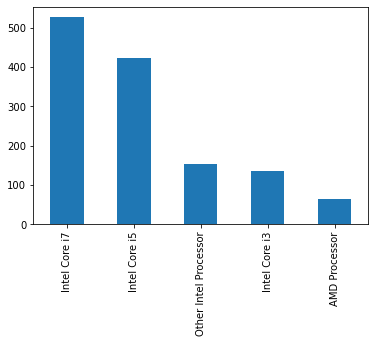

In [55]:
df['CPU Brand'].value_counts().plot(kind='bar')

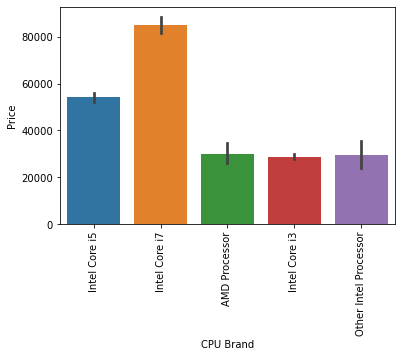

In [56]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Dropping the columns, CPU and cpu name

In [57]:
df.drop(columns=['Cpu','cpu_name'],inplace=True)

In [58]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Brand
1138,MSI,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.72,0,0,127.335675,Intel Core i7
898,Dell,Notebook,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.92,0,0,100.454670,Intel Core i3
322,Asus,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,58288.32,0,0,157.350512,Intel Core i7


In [59]:
df.corr()['Ips']

Ram            0.116984
Weight        -0.294620
Price          0.191226
Touchscreen    1.000000
Ips            1.000000
ppi            0.460587
Name: Ips, dtype: float64

# COmputer of which RAM is the most selling


<AxesSubplot:>

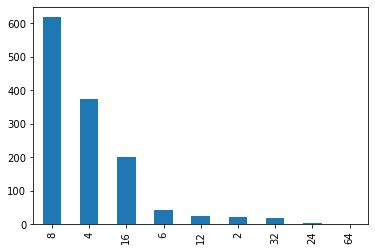

In [60]:
df['Ram'].value_counts().plot(kind='bar')

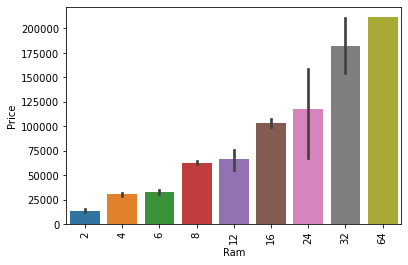

In [61]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#As ram increases, Price also increases steadily

# Making 4 new columns from the memory column.
# The four columns are : HDD, SSD, Hybrid and Flash Storage

In [63]:
df['Memory'].value_counts()[0:10]

256GB SSD               412
1TB HDD                 223
500GB HDD               132
512GB SSD               118
128GB SSD +  1TB HDD     94
128GB SSD                76
256GB SSD +  1TB HDD     73
32GB Flash Storage       38
2TB HDD                  16
64GB Flash Storage       15
Name: Memory, dtype: int64

In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Brand
80,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403.4048,0,0,141.211998,Intel Core i5
1109,Asus,Gaming,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.59,71341.9200,0,0,141.211998,Intel Core i7
856,Asus,Notebook,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,23922.7200,0,0,100.454670,Other Intel Processor
1290,Dell,Notebook,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,100.454670,Intel Core i3
573,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,44222.4000,0,0,141.211998,Intel Core i5


In [65]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Newtan\AppData\Local\Temp/ipykernel_2264/4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Newtan\AppData\Local\Temp/ipykernel_2264/4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [66]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
1106,MSI,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.9,80516.2032,0,0,127.335675,Intel Core i7,1000,128,0,0
1099,Asus,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 980M,Windows 10,4.3,122490.7200,0,0,127.335675,Intel Core i7,1000,128,0,0
982,Lenovo,Notebook,6,256 SSD,AMD Radeon 530,Windows 10,2.2,29250.7200,0,0,141.211998,AMD Processor,0,256,0,0
63,Asus,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.4,50136.4800,0,0,157.350512,Intel Core i5,0,256,0,0
175,Dell,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.3,24455.5200,0,0,100.454670,Intel Core i3,1000,0,0,0


# Dropping the Memory column

In [67]:
df.drop(columns=['Memory'],inplace=True)

In [68]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.191226
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

### Price dependent a lot upon SSD and RAM, and negatively on the HHD !!!

In [69]:
df.drop(columns=['Ram','Flash_Storage'],inplace=True)

# Resolving the GPU Column


In [70]:
def gpu_brand(obj):
    text=str(obj)
    lists=text.split(' ')
    return lists[0]

df['Gpu brand'] = df['Gpu'].apply(gpu_brand)

In [71]:
df.head()

,Company,TypeName,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Gpu brand
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,Intel
2,HP,Notebook,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,0,Intel


In [72]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

# One ARM Gpu Brand is not going to help us much, so just remove the ARM Thing.

In [73]:
df=df[df['Gpu brand']!='ARM']

In [74]:
df.sample()

,Company,TypeName,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Gpu brand
1136,HP,Workstation,Nvidia Quadro M3000M,Windows 7,3.0,210424.032,0,0,127.335675,Intel Core i7,0,256,0,Nvidia


In [75]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

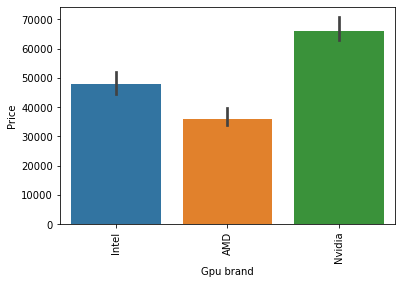

In [76]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# Drop the GPU Column

In [77]:
df.drop(columns=['Gpu'],inplace=True)

# Operating Systems Column. Reduce the number of types

In [78]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [81]:
def return_os(obj):
    os=str(obj)
    if ('Windows 10' in os) or ('Windows 7' in os) or ('Windows 10 S' in os):
        return 'Windows'
    elif ('macOS' in os) or ('Mac OS X' in os):
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [82]:
df['os']=df['OpSys'].apply(return_os)

In [85]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

In [86]:
df.drop(columns=['OpSys'],inplace=True)


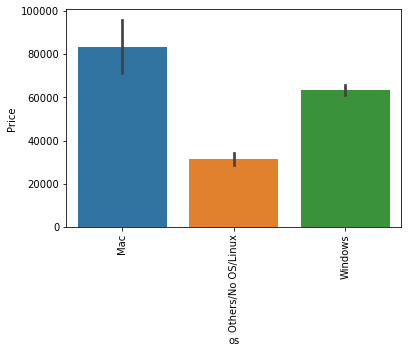

In [87]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

D:\Users\Newtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

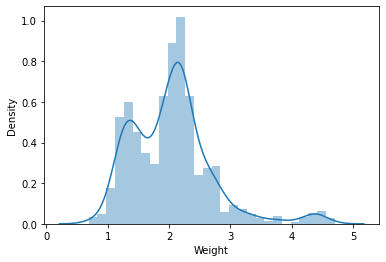

In [88]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

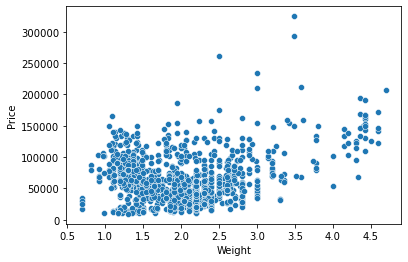

In [89]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [90]:
df.corr()['Price']

Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.192917
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Hybrid         0.007942
Name: Price, dtype: float64

# Analyzing the relation between the pairwise different columns by Making the HEATMAP

<AxesSubplot:>

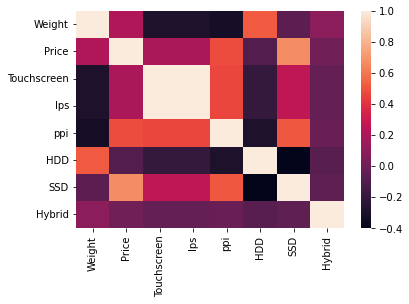

In [92]:
sns.heatmap(df.corr())

D:\Users\Newtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

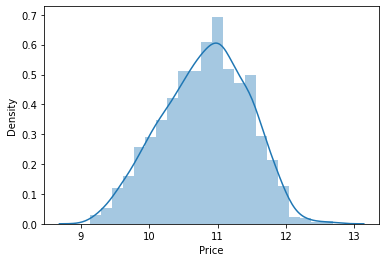

In [93]:
sns.distplot(np.log(df['Price']))

In [94]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

# Importing modules for finally training and Testing the data as well as building our model

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

# Importing Algorithms as well

In [101]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [102]:
# We always pass transformers in the form of tuple

In [103]:
df.head()

,Company,TypeName,Weight,Price,Touchscreen,Ips,ppi,CPU Brand,HDD,SSD,Hybrid,Gpu brand,os
0,Apple,Ultrabook,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,0,Intel,Mac
1,Apple,Ultrabook,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,Intel,Mac
2,HP,Notebook,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,0,AMD,Mac
4,Apple,Ultrabook,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,0,Intel,Mac


# Linear Regression


In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: could not convert string to float: 'AMD Processor'

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: CPU Brand, dtype: int64